In [1]:
import numpy as np
import pandas as pd
import janitor
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Introduction

# Births analysis and birth rates calculations


## Import the datasets

### Births dataset

In [2]:
df_b = pd.read_csv(r'../datasets/clean_births_df.csv')
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522885 entries, 0 to 522884
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   anio                            522885 non-null  int64 
 1   jurisdiccion_residencia_id      522885 non-null  int64 
 2   jurisdiccion_residencia_nombre  522885 non-null  object
 3   edad_madre_grupo                522885 non-null  object
 4   instruccion_madre               522885 non-null  object
 5   tipo_de_parto_id                522885 non-null  int64 
 6   tipo_de_parto_nombre            522885 non-null  object
 7   semana_gestacion                522885 non-null  object
 8   intervalo_peso_al_nacer         522885 non-null  object
 9   sexo_id                         522885 non-null  int64 
 10  sexo                            522885 non-null  object
 11  nacimientos_cantidad            522885 non-null  int64 
dtypes: int64(5), object(7)
memory 

In [3]:
df_b.sample(5).T

,128091,324757,480640,147860,515062
anio,2005,2020,2010,2008,2019
jurisdiccion_residencia_id,66,6,6,90,70
jurisdiccion_residencia_nombre,Salta,Buenos Aires,Buenos Aires,Tucumán,San Juan
edad_madre_grupo,3.20 a 24,5.30 a 34,3.20 a 24,6.35 a 39,8.De 45 y más
instruccion_madre,5.Secundaria/Polimodal Completa,3.Primaria/C. EGB Completa,5.Secundaria/Polimodal Completa,7.Terciaria/Universitaria Completa,5.Secundaria/Polimodal Completa
tipo_de_parto_id,1,1,2,1,2
tipo_de_parto_nombre,Simple,Simple,Multiple,Simple,Multiple
semana_gestacion,6.37 a 41,6.37 a 41,5.32 a 36,5.32 a 36,5.32 a 36
intervalo_peso_al_nacer,7.3000 a 3499,4.1500 a 1999,4.1500 a 1999,5.2000 a 2499,4.1500 a 1999
sexo_id,2,2,2,2,1


In [4]:
categorical_columns = df_b.select_dtypes('object').columns
df_b[categorical_columns] = df_b[categorical_columns].astype('category')

In [5]:
df_b.drop(columns=df_b.select_columns('*_id').columns, inplace=True)

In [6]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522885 entries, 0 to 522884
Data columns (total 9 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   anio                            522885 non-null  int64   
 1   jurisdiccion_residencia_nombre  522885 non-null  category
 2   edad_madre_grupo                522885 non-null  category
 3   instruccion_madre               522885 non-null  category
 4   tipo_de_parto_nombre            522885 non-null  category
 5   semana_gestacion                522885 non-null  category
 6   intervalo_peso_al_nacer         522885 non-null  category
 7   sexo                            522885 non-null  category
 8   nacimientos_cantidad            522885 non-null  int64   
dtypes: category(7), int64(2)
memory usage: 11.5 MB


### Population datasets

In [7]:
df_population_census = pd.read_csv(
    r'../datasets/total-population-all-census.csv')
df_population_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   year        11 non-null     int64
 1   population  11 non-null     int64
dtypes: int64(2)
memory usage: 304.0 bytes


In [8]:
df_population_estimation = pd.read_csv(
    r'../datasets/population-2010-to-2040.csv')
df_population_estimation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   year        31 non-null     int64
 1   population  31 non-null     int64
dtypes: int64(2)
memory usage: 624.0 bytes


In [9]:
df_population_provinces = pd.read_csv(
    r'../datasets/population-provinces-2001-2010-2022.csv')
df_population_provinces.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   provincia       24 non-null     object
 1   poblacion_2001  24 non-null     int64 
 2   poblacion_2010  24 non-null     int64 
 3   poblacion_2022  24 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 896.0+ bytes


In [10]:
df_population_provinces = (
    df_population_provinces
    .rename_column('provincia','province')
    .melt(
        id_vars='province',
        var_name='year',
        value_name='population'
    )
    .transform_column('year', lambda s: int(s[-4:]))
)
df_population_provinces.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   province    72 non-null     object
 1   year        72 non-null     int64 
 2   population  72 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.8+ KB


## Analysis

### Population

In [11]:
min_year = df_population_census['year'].min()
max_year = df_population_estimation['year'].max()

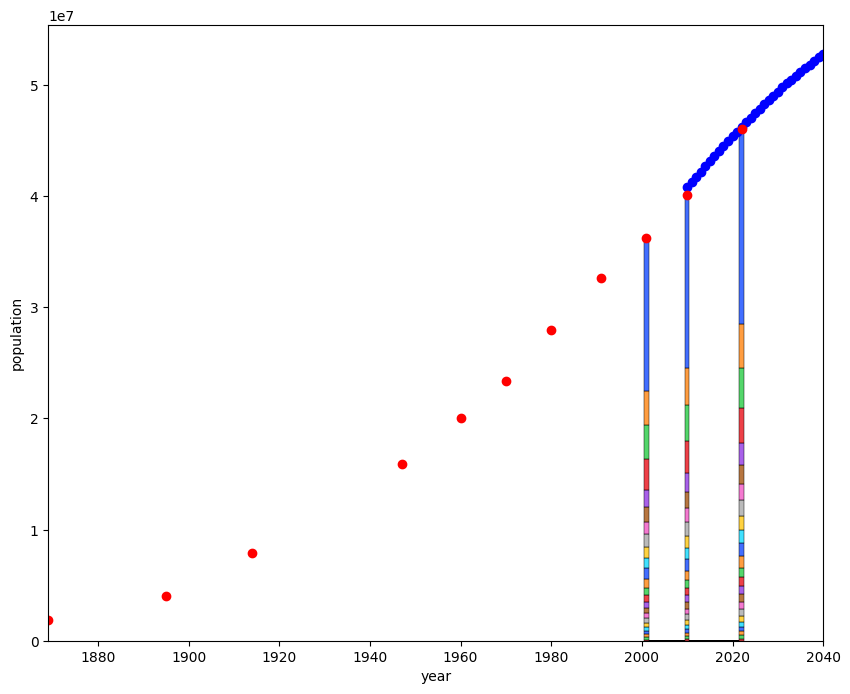

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlim((min_year, max_year))
ax.plot(df_population_estimation.year,df_population_estimation.population,'bo')
ax.plot(df_population_census.year,df_population_census.population,'ro')
sns.histplot(data=df_population_provinces,
             x='year',
             weights='population',
             discrete=True,
             hue='province',
             multiple="stack",
             legend=False,
             palette="bright")
ax.set_ylabel('population')

plt.show()

In the study area (2001-2021), population growth seems to show a linear trend. This will be corroborated with data by province.

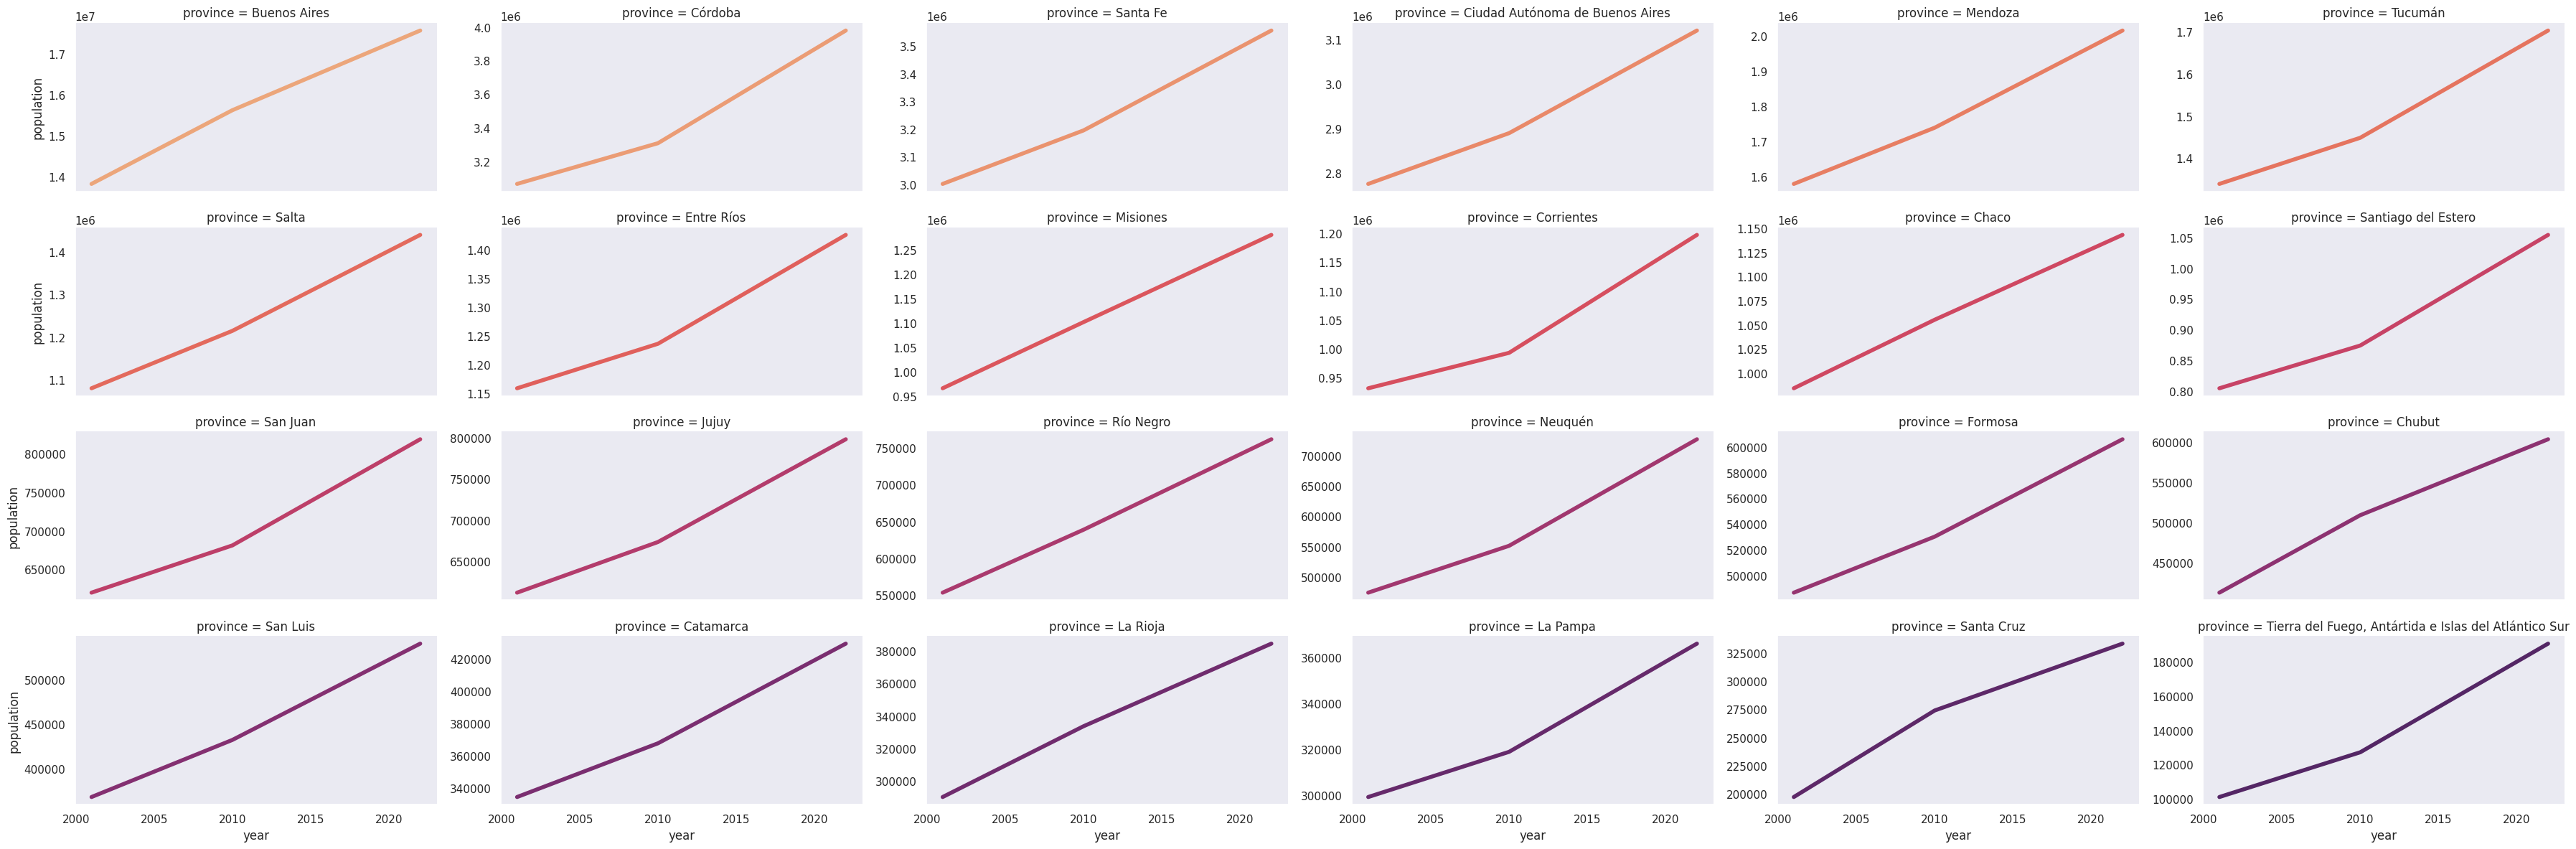

In [13]:
sns.set_theme(style="dark")
sns.relplot(data=df_population_provinces,
            x='year', y='population', col='province', hue='province',
            kind="line", palette="flare", linewidth=4, zorder=5,
            col_wrap=6, height=3, aspect=2, legend=False,
            facet_kws={'sharey': False})
plt.show()

Since some provinces do not seem to correspond to linear growth, it is decided that a second degree polynomial approximation will be good enough.

In [24]:
def predict_population_province(province:str, show_plot:bool = True):
    df_province = df_population_provinces.query(f'province == "{province}"')
    p_province = np.polyfit(df_province.year.values,df_province.population.values,deg=2)
    years_complete = list(range(2001,2023))
    population_complete = np.polyval(p_province, years_complete)
    if show_plot:
        plt.plot(df_province.year.values,df_province.population.values,'ro')
        plt.plot(years_complete,population_complete,'b.')
        plt.show()
    return years_complete,population_complete

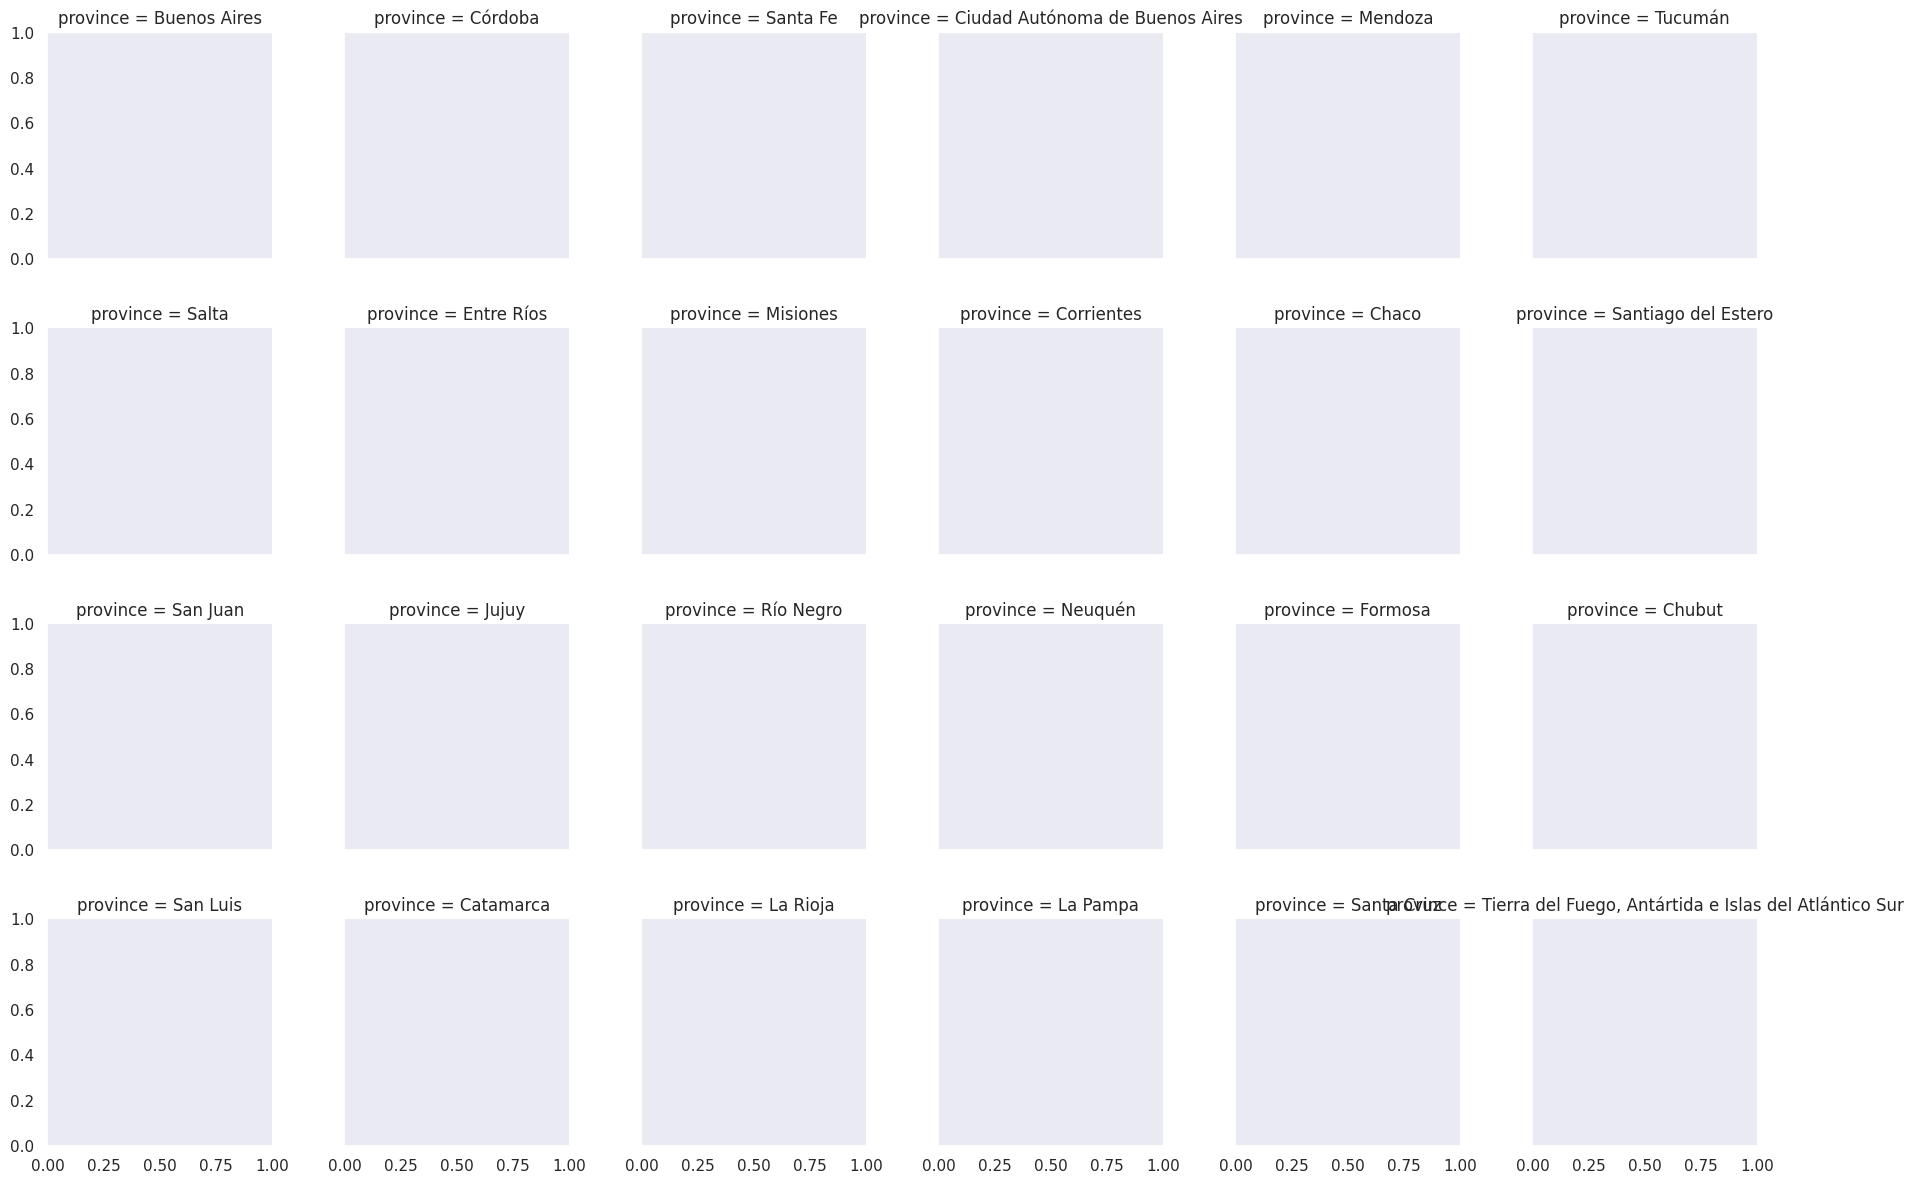

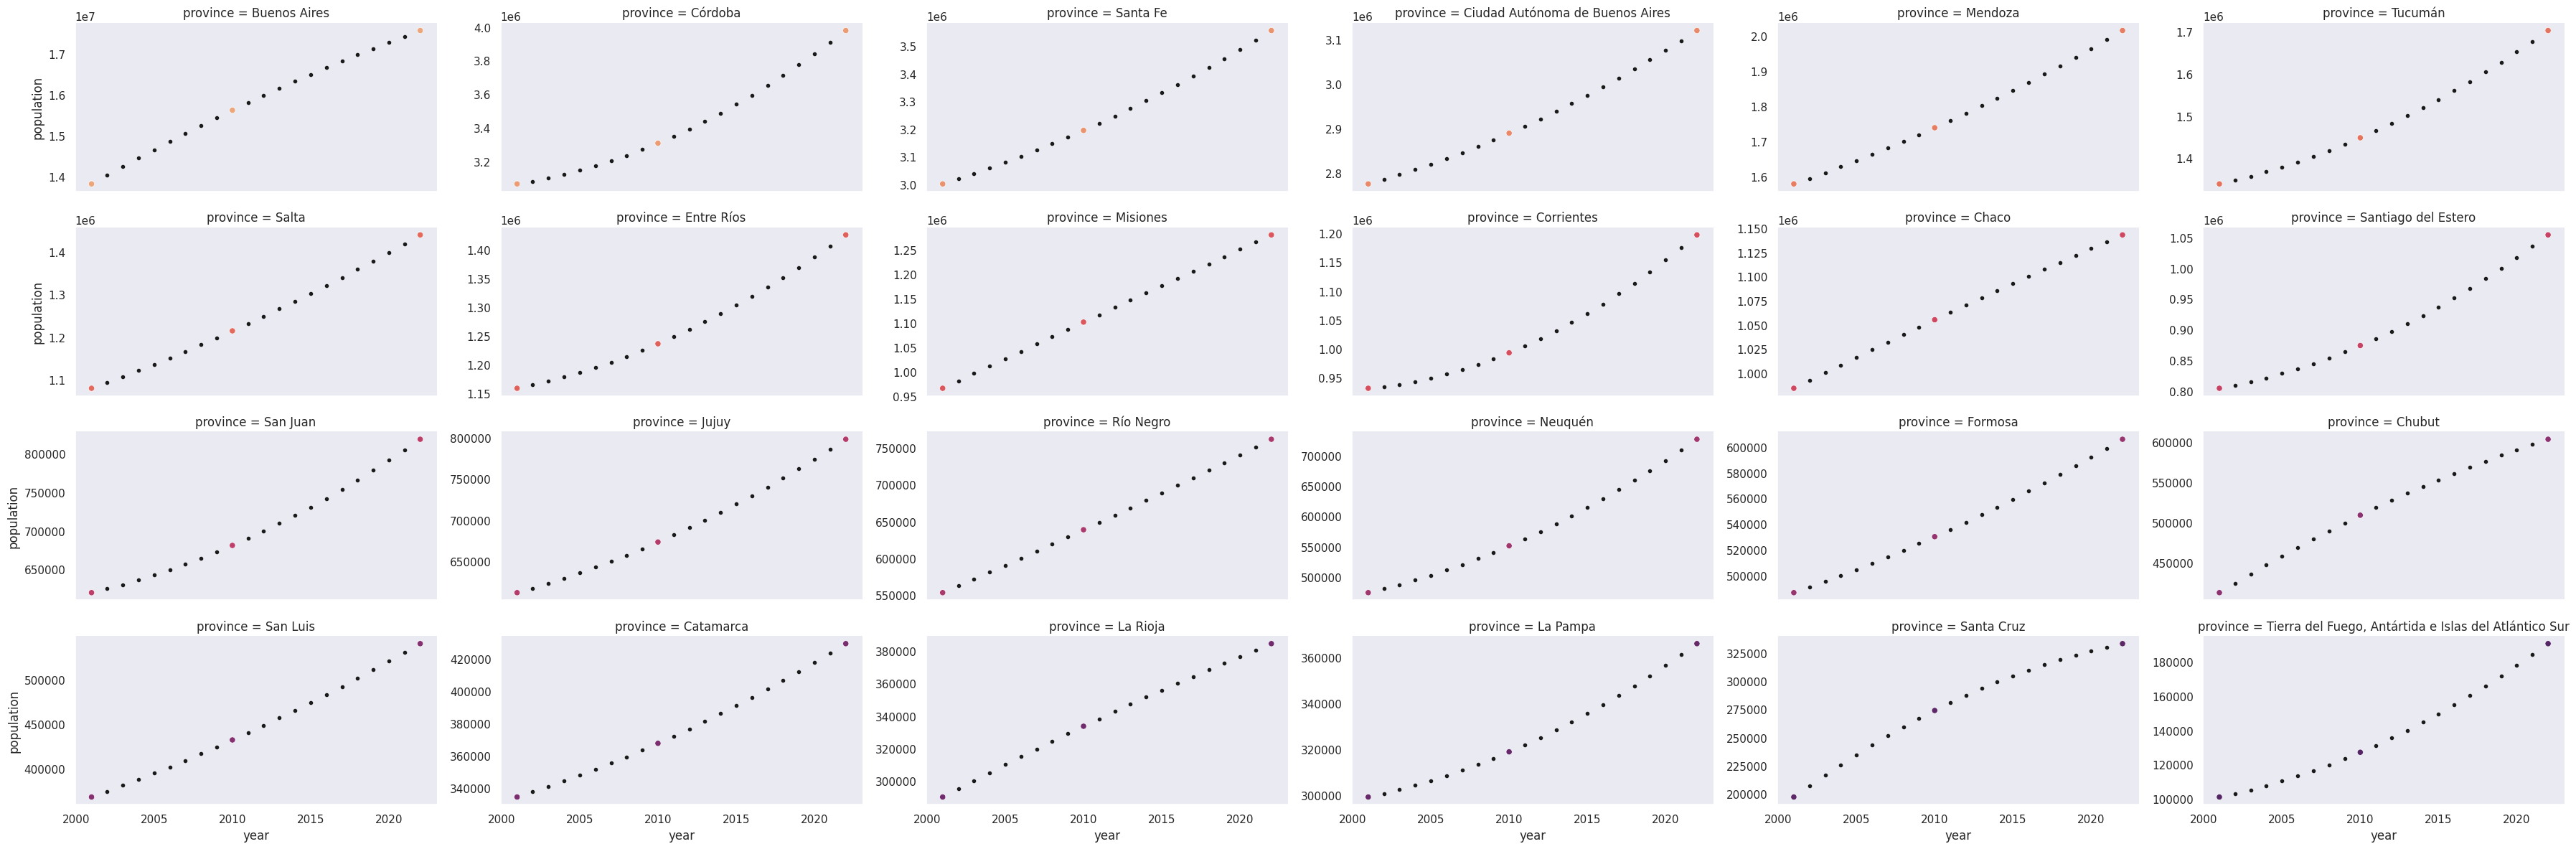

In [61]:
sns.set_theme(style="dark")

df_population_provinces_complete = pd.DataFrame(columns=['province', 'year', 'population'])

fig = sns.FacetGrid(data=df_population_provinces, col='province', col_wrap=6)

fig = sns.relplot(data=df_population_provinces,
            x='year', y='population', col='province', hue='province',
            kind="scatter", palette="flare", zorder=5,
            col_wrap=6, height=3, aspect=2, legend=False,
            facet_kws={'sharey': False})

# Iterate over each subplot to customize further
for zone, ax in fig.axes_dict.items():
    years_complete,population_complete = predict_population_province(zone, False)
    df_population_provinces_complete = pd.concat([df_population_provinces_complete, pd.DataFrame({'province':zone, 'year':years_complete, 'population':population_complete})]).reset_index(drop=True)
    ax.plot(years_complete,population_complete,'k.')
    
plt.show()

In [70]:
df_population_provinces_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   province    528 non-null    object 
 1   year        528 non-null    object 
 2   population  528 non-null    float64
dtypes: float64(1), object(2)
memory usage: 12.5+ KB


In [87]:
df_population_provinces_complete = (
    df_population_provinces_complete
    .pivot(index='province', columns='year', values='population')
)

In [88]:
df_population_provinces_complete

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
province,,,,,,,,,,,,,,,,,,,,,
Buenos Aires,1.382720e+07,1.404136e+07,1.425191e+07,1.445887e+07,1.466223e+07,1.486199e+07,1.505816e+07,1.525073e+07,1.543971e+07,1.562508e+07,...,1.615963e+07,1.633062e+07,1.649802e+07,1.666181e+07,1.682201e+07,1.697861e+07,1.713162e+07,1.728103e+07,1.742684e+07,1.756905e+07
Catamarca,3.345680e+05,3.377118e+05,3.409935e+05,3.444131e+05,3.479708e+05,3.516663e+05,3.554998e+05,3.594713e+05,3.635807e+05,3.678280e+05,...,3.813977e+05,3.861968e+05,3.911339e+05,3.962090e+05,4.014219e+05,4.067728e+05,4.122617e+05,4.178885e+05,4.236533e+05,4.295560e+05
Chaco,9.844460e+05,9.925272e+05,1.000555e+06,1.008530e+06,1.016451e+06,1.024319e+06,1.032134e+06,1.039896e+06,1.047604e+06,1.055259e+06,...,1.077904e+06,1.085346e+06,1.092735e+06,1.100070e+06,1.107352e+06,1.114581e+06,1.121756e+06,1.128878e+06,1.135947e+06,1.142963e+06
Chubut,4.132370e+05,4.249629e+05,4.364203e+05,4.476094e+05,4.585301e+05,4.691825e+05,4.795664e+05,4.896820e+05,4.995292e+05,5.091080e+05,...,5.362341e+05,5.447394e+05,5.529763e+05,5.609449e+05,5.686450e+05,5.760768e+05,5.832401e+05,5.901351e+05,5.967618e+05,6.031200e+05
Ciudad Autónoma de Buenos Aires,2.776138e+06,2.786316e+06,2.797116e+06,2.808539e+06,2.820585e+06,2.833253e+06,2.846544e+06,2.860457e+06,2.874993e+06,2.890151e+06,...,2.939362e+06,2.957010e+06,2.975281e+06,2.994175e+06,3.013692e+06,3.033831e+06,3.054592e+06,3.075976e+06,3.097983e+06,3.120612e+06
Corrientes,9.309910e+05,9.339369e+05,9.378575e+05,9.427529e+05,9.486230e+05,9.554679e+05,9.632875e+05,9.720819e+05,9.818511e+05,9.925950e+05,...,1.030675e+06,1.045318e+06,1.060936e+06,1.077528e+06,1.095096e+06,1.113638e+06,1.133154e+06,1.153646e+06,1.175112e+06,1.197553e+06
Córdoba,3.066801e+06,3.082672e+06,3.101299e+06,3.122683e+06,3.146823e+06,3.173720e+06,3.203374e+06,3.235785e+06,3.270952e+06,3.308876e+06,...,3.439188e+06,3.488138e+06,3.539846e+06,3.594310e+06,3.651530e+06,3.711508e+06,3.774242e+06,3.839733e+06,3.907980e+06,3.978984e+06
Entre Ríos,1.158147e+06,1.164046e+06,1.170633e+06,1.177908e+06,1.185870e+06,1.194519e+06,1.203857e+06,1.213882e+06,1.224594e+06,1.235994e+06,...,1.274320e+06,1.288470e+06,1.303308e+06,1.318833e+06,1.335047e+06,1.351947e+06,1.369536e+06,1.387811e+06,1.406775e+06,1.426426e+06
Formosa,4.865590e+05,4.908406e+05,4.952629e+05,4.998261e+05,5.045300e+05,5.093748e+05,5.143604e+05,5.194868e+05,5.247540e+05,5.301620e+05,...,5.472309e+05,5.532021e+05,5.593141e+05,5.655670e+05,5.719606e+05,5.784951e+05,5.851704e+05,5.919864e+05,5.989433e+05,6.060410e+05


### Births

In [89]:
df_b = (
    df_b.
    groupby(['jurisdiccion_residencia_nombre', 'anio'])
    .sum('nacimientos_cantidad')
    .reset_index()
    .rename_columns({
        'jurisdiccion_residencia_nombre': 'province',
        'anio' : 'year',
        'nacimientos_cantidad' : 'births'
    })
    .pivot(index='province', columns='year', values='births')
)

In [90]:
df_b

year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
province,,,,,,,,,,,,,,,,,
Buenos Aires,262786,261941,263343,280318,279941,288831,291102,282031,289451,294329,287523,272471,262721,251377,227596,191474,190096
Catamarca,7202,6837,6969,7206,6876,6818,6579,6324,6570,6840,6835,6685,6392,6696,5733,4950,4764
Chaco,23140,20235,19173,21919,21703,22717,24472,22041,22296,22798,25952,22023,23125,24783,22176,18488,18673
Chubut,8550,8994,9213,9864,9921,9981,9832,9696,10076,9881,9858,9608,9023,8539,7861,6991,6426
Ciudad Autónoma de Buenos Aires,43633,44065,42737,45820,44615,45429,45280,43733,43615,43716,41866,40136,35840,35467,33981,28103,26044
Corrientes,19805,18561,18982,19984,20373,20477,20839,19639,19899,20933,20658,20033,19987,19855,18144,16547,15743
Córdoba,55662,54222,53963,58073,58595,58540,57861,56864,55965,59246,58558,56460,54804,53569,50929,44348,44159
Entre Ríos,21875,21181,20985,21538,22228,22357,22216,21874,22371,23318,23572,22195,21966,21283,19232,17012,16402
Formosa,12176,11237,11241,12222,11969,11730,12196,12005,11957,12531,12331,11369,11591,11809,10250,9218,8818


Check that the names in both, population and births dataframes, are the same.

In [101]:
births_provinces = df_b.index.tolist()
population_provinces = df_population_provinces_complete.index.tolist()

print('--- Not in pop df ---')
for province in births_provinces:
    if province not in population_provinces:
        print(province)

print('\n--- Not in birth df ---')
for province in population_provinces:
    if province not in births_provinces:
        print(province)

--- Not in pop df ---
Sin Información

--- Not in birth df ---


Excellent! Now its time to calculate birthrates

### Calculus of birthrate

In [109]:
birthrates = list()
for province in df_population_provinces_complete.index.tolist():
    for year in df_b.columns.tolist():
        birthrates.append((year,
                           province,
                           1000*df_b.loc[province,year]/df_population_provinces_complete.loc[province,year])
                           )

In [110]:
pd.DataFrame(birthrates, columns=['year','province','birthrate'])

,year,province,birthrate
0,2005,Buenos Aires,17.922649
1,2006,Buenos Aires,17.624889
2,2007,Buenos Aires,17.488389
3,2008,Buenos Aires,18.380625
4,2009,Buenos Aires,18.131238
...,...,...,...
403,2017,Tucumán,17.302125
404,2018,Tucumán,17.399314
405,2019,Tucumán,15.474434
406,2020,Tucumán,13.098852


## Conclusions

When compared with the official [birth rate data](http://datos.salud.gob.ar/dataset/314e08d7-70a1-4704-aa2f-e86ce03b359d/archivo/0f68d5c6-e667-40ca-90fd-4784336e092e) provided by the [government](http://datos.salud.gob.ar), the calculated values are close, but not exactly the same. This may be due to an error in the population predictions or lack of data in the birth data.\
\
It is decided that the official data set will be used for the final analysis.

# Birth rates Analysis

## Import the dataset birthrate

In [97]:
df_br = pd.read_csv(r'../datasets/clean_birthrate_df.csv')
df_br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       550 non-null    int64  
 1   zone       550 non-null    object 
 2   birthrate  550 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 13.0+ KB


## Analysis

In [ ]:
def plot_birthrate_provinces(df: pd.DataFrame,
                             zones: list = all,
                             title=None,
                             cols=4):
    if zones != all:
        query = (' or '.join([f'zone == "{zone}"' for zone in zones]))
        df_prov = df.query(query)
    else:
        df_prov = df.query('zone != "argentina"')
    df_arg = df.query('zone == "argentina"')

    sns.set_theme(style="dark")
    # fig,ax = plt.subplots(figsize=(15,8))
    fig = sns.relplot(data=df_prov,
                      x='year', y='birthrate', col='zone', hue='zone',
                      kind="line", palette="flare", linewidth=4, zorder=5,
                      col_wrap=cols, height=3, aspect=2, legend=False)

    # Iterate over each subplot to customize further
    for zone, ax in fig.axes_dict.items():

        # Add the title as an annotation within the plot
        ax.text(.8, .85, zone, transform=ax.transAxes, fontweight="bold")

        # Plot every zone's time series in the background
        sns.lineplot(
            data=df_prov, x="year", y="birthrate", units="zone",
            estimator=None, color=".7", linewidth=1, ax=ax)
        sns.lineplot(
            data=df_arg, x="year", y="birthrate",
            estimator=None, color=".3", linewidth=2, ax=ax)
        ax.text(x=2002, y=20, s='Argentina')
        # ax.vlines(x=2020.5, ymin=8, ymax=23, colors='.7')
        plt.xlim((1999, 2022))

    # Reduce the frequency of the x axis ticks
    # ax.set_xticks(ax.get_xticks()[::2])

    # Tweak the supporting aspects of the plot
    fig.set_titles("")
    fig.set_axis_labels("", "birthrate")
    fig.tight_layout()

    plt.show()

In [ ]:
plot_birthrate_provinces(df_br)

### Provinces with stricter quarantine according to [infobae](https://www.infobae.com/economia/2020/12/29/cuales-fueron-las-provincias-que-mas-sufrieron-la-cuarentena-y-su-impacto-economico/)

In [ ]:
provinces_with_stricter_quarantine = [
    'tierra_del_fuego', 'jujuy', 'buenos_aires']

In [ ]:
plot_birthrate_provinces(df_br,
                         zones=provinces_with_stricter_quarantine,
                         cols=3)

### Provinces with more flexible quarantine according to [El Cronista](https://www.cronista.com/economia-politica/Cuales-son-las-6-provincias-donde-no-se-endurecio-la-cuarentena-y-que-las-diferencia-20201010-0003.html)

In [ ]:
provinces_with_more_flexible_quarantine = [
    'corrientes', 'misiones', 'la_pampa', 'entre_rios', 'formosa', 'catamarca']

In [ ]:
plot_birthrate_provinces(df_br,
                         zones=provinces_with_more_flexible_quarantine,
                         cols=3)

# Conclusions

Only *Buenos Aires* shows an increase in the birth rate in 2021 with respect to the trend. However, it is only one of the three provinces with the hardest quarantine, while the other two, *Jujuy* and *Tierra del Fuego*, are more similar to the provinces with more flexibility.